In [45]:
from sklearn import cluster
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import fcluster
import scipy 
from math import pi

#Importation des données
df = pd.read_csv('assurance.csv', delimiter= ',',header=0)

#Sélection des données 
B = df.iloc[:,0:37]

print(B)

       cle  nbmaisons  nbpers_au_foyer  type_client  catholique  protestant  \
0        1          1                3            8           0           5   
1        2          1                2            8           1           4   
2        3          1                2            8           0           4   
3        4          1                3            3           2           3   
4        5          1                4           10           1           4   
...    ...        ...              ...          ...         ...         ...   
5817  5818          1                1            8           0           6   
5818  5819          1                4            8           1           4   
5819  5820          1                3            8           0           6   
5820  5821          1                3            8           0           7   
5821  5822          1                3            8           0           6   

      autre_religion  sans_religion  marie  concubi

[0.62646572 1.         2.         3.         4.         5.
 6.         7.         8.        ]
[0.62646572 0.58967353 2.         3.         4.         5.
 6.         7.         8.        ]
[0.62646572 0.58967353 0.57110852 3.         4.         5.
 6.         7.         8.        ]
[0.62646572 0.58967353 0.57110852 0.55979174 4.         5.
 6.         7.         8.        ]
[0.62646572 0.58967353 0.57110852 0.55979174 0.55210339 5.
 6.         7.         8.        ]
[0.62646572 0.58967353 0.57110852 0.55979174 0.55210339 0.54644808
 6.         7.         8.        ]
[0.62646572 0.58967353 0.57110852 0.55979174 0.55210339 0.54644808
 0.54207325 7.         8.        ]
[0.62646572 0.58967353 0.57110852 0.55979174 0.55210339 0.54644808
 0.54207325 0.53850803 8.        ]
[0.62646572 0.58967353 0.57110852 0.55979174 0.55210339 0.54644808
 0.54207325 0.53850803 0.535528  ]


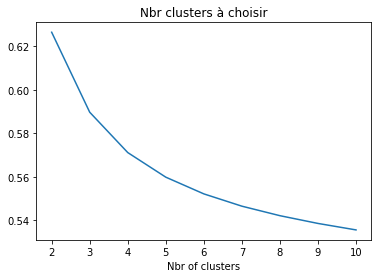

In [46]:
from sklearn import metrics

#On fait varier le nombre de clusters pour savoir le nombre qu'il faut vraiment prendre
res = np.arange(9,dtype="double")
for k in np.arange(9):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(B)
    res[k] = metrics.silhouette_score(B,km.labels_)
    print(res)
    
#graphique
import matplotlib.pyplot as plt
plt.title("Nbr clusters à choisir")
plt.xlabel("Nbr of clusters")
plt.plot(np.arange(2,11,1),res)
plt.show()

#On prend 4 clusters

In [47]:
#Preprocessing
sc = StandardScaler()
Z = sc.fit_transform(B)
print(Z)
#Realisation des K-means
kmeans = cluster.KMeans(n_clusters=4)
kmeans.fit(Z)
idk = np.argsort(kmeans.labels_)



#affichage des observations et leurs groupes
x_km = pd.DataFrame(df.index[idk],kmeans.labels_[idk])
print(x_km)
#distances aux centres de classes des observations
print(kmeans.transform(Z))

groupe = pd.DataFrame(df.index[idk],kmeans.labels_[idk])
groupe['y'] = groupe.index
groupe.columns = ['ind', 'gr']
groupe['ind'] = groupe['ind']+1

#On obtient pour chaque individu le groupe auquel il appartient
print(groupe.sort_values(by = 'ind'))
#On a segmente le dataset

#Il faut maintenant caracteriser les groupes
B = B.merge(groupe, left_on='cle', right_on='ind')
del B['ind']
print(B.mean())

[[-1.73175333 -0.27257995  0.40669664 ... -0.36749926  0.16359307
  -0.61602311]
 [-1.73115833 -0.27257995 -0.85950007 ... -0.36749926  0.92250851
  -0.11776157]
 [-1.73056333 -0.27257995 -0.85950007 ... -0.36749926 -0.59532236
  -0.11776157]
 ...
 [ 1.73056333 -0.27257995  0.40669664 ... -0.36749926 -0.59532236
  -0.61602311]
 [ 1.73115833 -0.27257995  0.40669664 ... -0.36749926  0.16359307
   0.87876151]
 [ 1.73175333 -0.27257995  0.40669664 ... -0.36749926 -0.59532236
  -0.61602311]]
       0
0   4772
0   1140
0   2631
0   1138
0   1137
..   ...
3   1913
3   4203
3   1914
3   4222
3   2910

[5822 rows x 1 columns]
[[6.79396077 7.41400476 4.13880713 4.92505867]
 [6.12151598 6.38454403 5.91721001 4.66764962]
 [4.60665075 9.44659022 6.41838933 6.74925716]
 ...
 [4.50094179 9.30689399 4.67354309 6.88861541]
 [8.03588127 8.23257386 5.45901001 6.22179717]
 [4.76029075 6.98442422 3.10896697 4.27469854]]
     ind  gr
2      1   2
3      2   3
0      3   0
3      4   3
1      5   1
..   ... 

<BarContainer object of 37 artists>

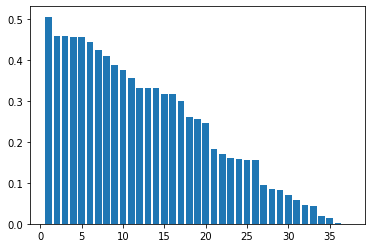

In [48]:
B2=X.mean()
SCT=X.shape[0]*X.var(ddof=0)
Xb=X.groupby(kmeans.labels_)
nk=Xb.size()
mk=Xb.mean()
EMk=(mk-B2)**2
EM=EMk.multiply(nk,axis=0)
SCE=np.sum(EM,axis=0)
R2=SCE/SCT
R2trie=R2.sort_values(ascending=False)

#diagramme représentant les rapports de corrélation pour recherche zone de coupure
plt.bar(range(1,R2trie.shape[0]+1),height=R2trie)

#On va prendre environ 10 variables pour le radar

In [49]:
#Sélection de tous les individus du groupe 0
b0 = B[B["gr"]==0]

#Sélection de tous les individus du groupe 1
b1 = B[B["gr"]==1]

#Sélection de tous les individus du groupe 2
b2 = B[B["gr"]==2]

#Sélection de tous les individus du groupe 3
b3 = B[B["gr"]==3]

print(b0.mean())

#Calcul des moyennes pour chaque varible et chaque groupe

G0_moyenne = b0.mean()

G1_moyenne = b1.mean()

G2_moyenne = b2.mean()

G3_moyenne = b3.mean()

#Création des dataframe pour chaque groupe contenant seulement les moyennes de chaque variable

G0 = pd.DataFrame(G0_moyenne)

G1 = pd.DataFrame(G1_moyenne)

G2 = pd.DataFrame(G2_moyenne)

G3 = pd.DataFrame(G3_moyenne)

G0 =G0.iloc[1:38]

G0.columns = ['moyenne']

G1 =G1.iloc[1:38]

G1.columns = ['moyenne']

G2 =G2.iloc[1:38]

G2.columns = ['moyenne']

G3 =G3.iloc[1:38]

G3.columns = ['moyenne']


#Création du dataframe contenant les moyennes de chaque variables pout tous les groupes

radar = pd.DataFrame(columns = G0.index  )

radar.loc[0] = G0['moyenne'].values.tolist()
radar.loc[1] = G1['moyenne'].values.tolist()
radar.loc[2] = G2['moyenne'].values.tolist()
radar.loc[3] = G3['moyenne'].values.tolist()

f = radar.describe()





cle                   2957.648577
nbmaisons                1.099934
nbpers_au_foyer          1.912641
type_client              5.803441
catholique               0.766380
protestant               4.054931
autre_religion           1.422899
sans_religion            3.555923
marie                    4.018531
concubin                 1.349437
autre_relation           4.129715
celibataire              3.911979
sans_enfant              3.160821
avec_enfant              2.470549
niv_etude_haut           1.238915
niv_etud_moy             3.393117
niv_etud_bas             4.800132
PCStop                   1.396426
PCScadre                 0.308405
PCSagri                  0.252151
PCSinter                 3.183322
PCSouvr_quali            2.105228
PCSouvr                  3.039709
locataire                6.730642
proprietaire             2.275976
auto1                    5.165453
auto2                    0.771674
auto0                    3.448709
assur_sante_public       7.043018
assur_sante_pr

In [50]:
#Sélection des variables dont la variance est supérieure à 1.5 dans chaque groupe afin de retirer les variables qui ont peu d'incidence

radar = radar.iloc[:,(f.iloc[2]>1.5).values]
print(radar)


   type_client  niv_etude_haut  niv_etud_bas    PCStop  locataire  \
0     5.803441        1.238915      4.800132  1.396426   6.730642   
1     2.454100        4.025704      1.806610  4.373317   1.801714   
2     7.686788        0.522779      6.641230  0.891800   4.563212   
3     5.375144        1.396433      3.584580  2.177215   2.883774   

   proprietaire  assur_sante_public  assur_sante_prive  pouvoir_achat  
0      2.275976            7.043018           1.956982       3.013898  
1      7.198286            3.522644           5.477356       6.629131  
2      4.447608            7.509112           1.490888       3.481777  
3      6.128308            5.661105           3.359033       4.936709  


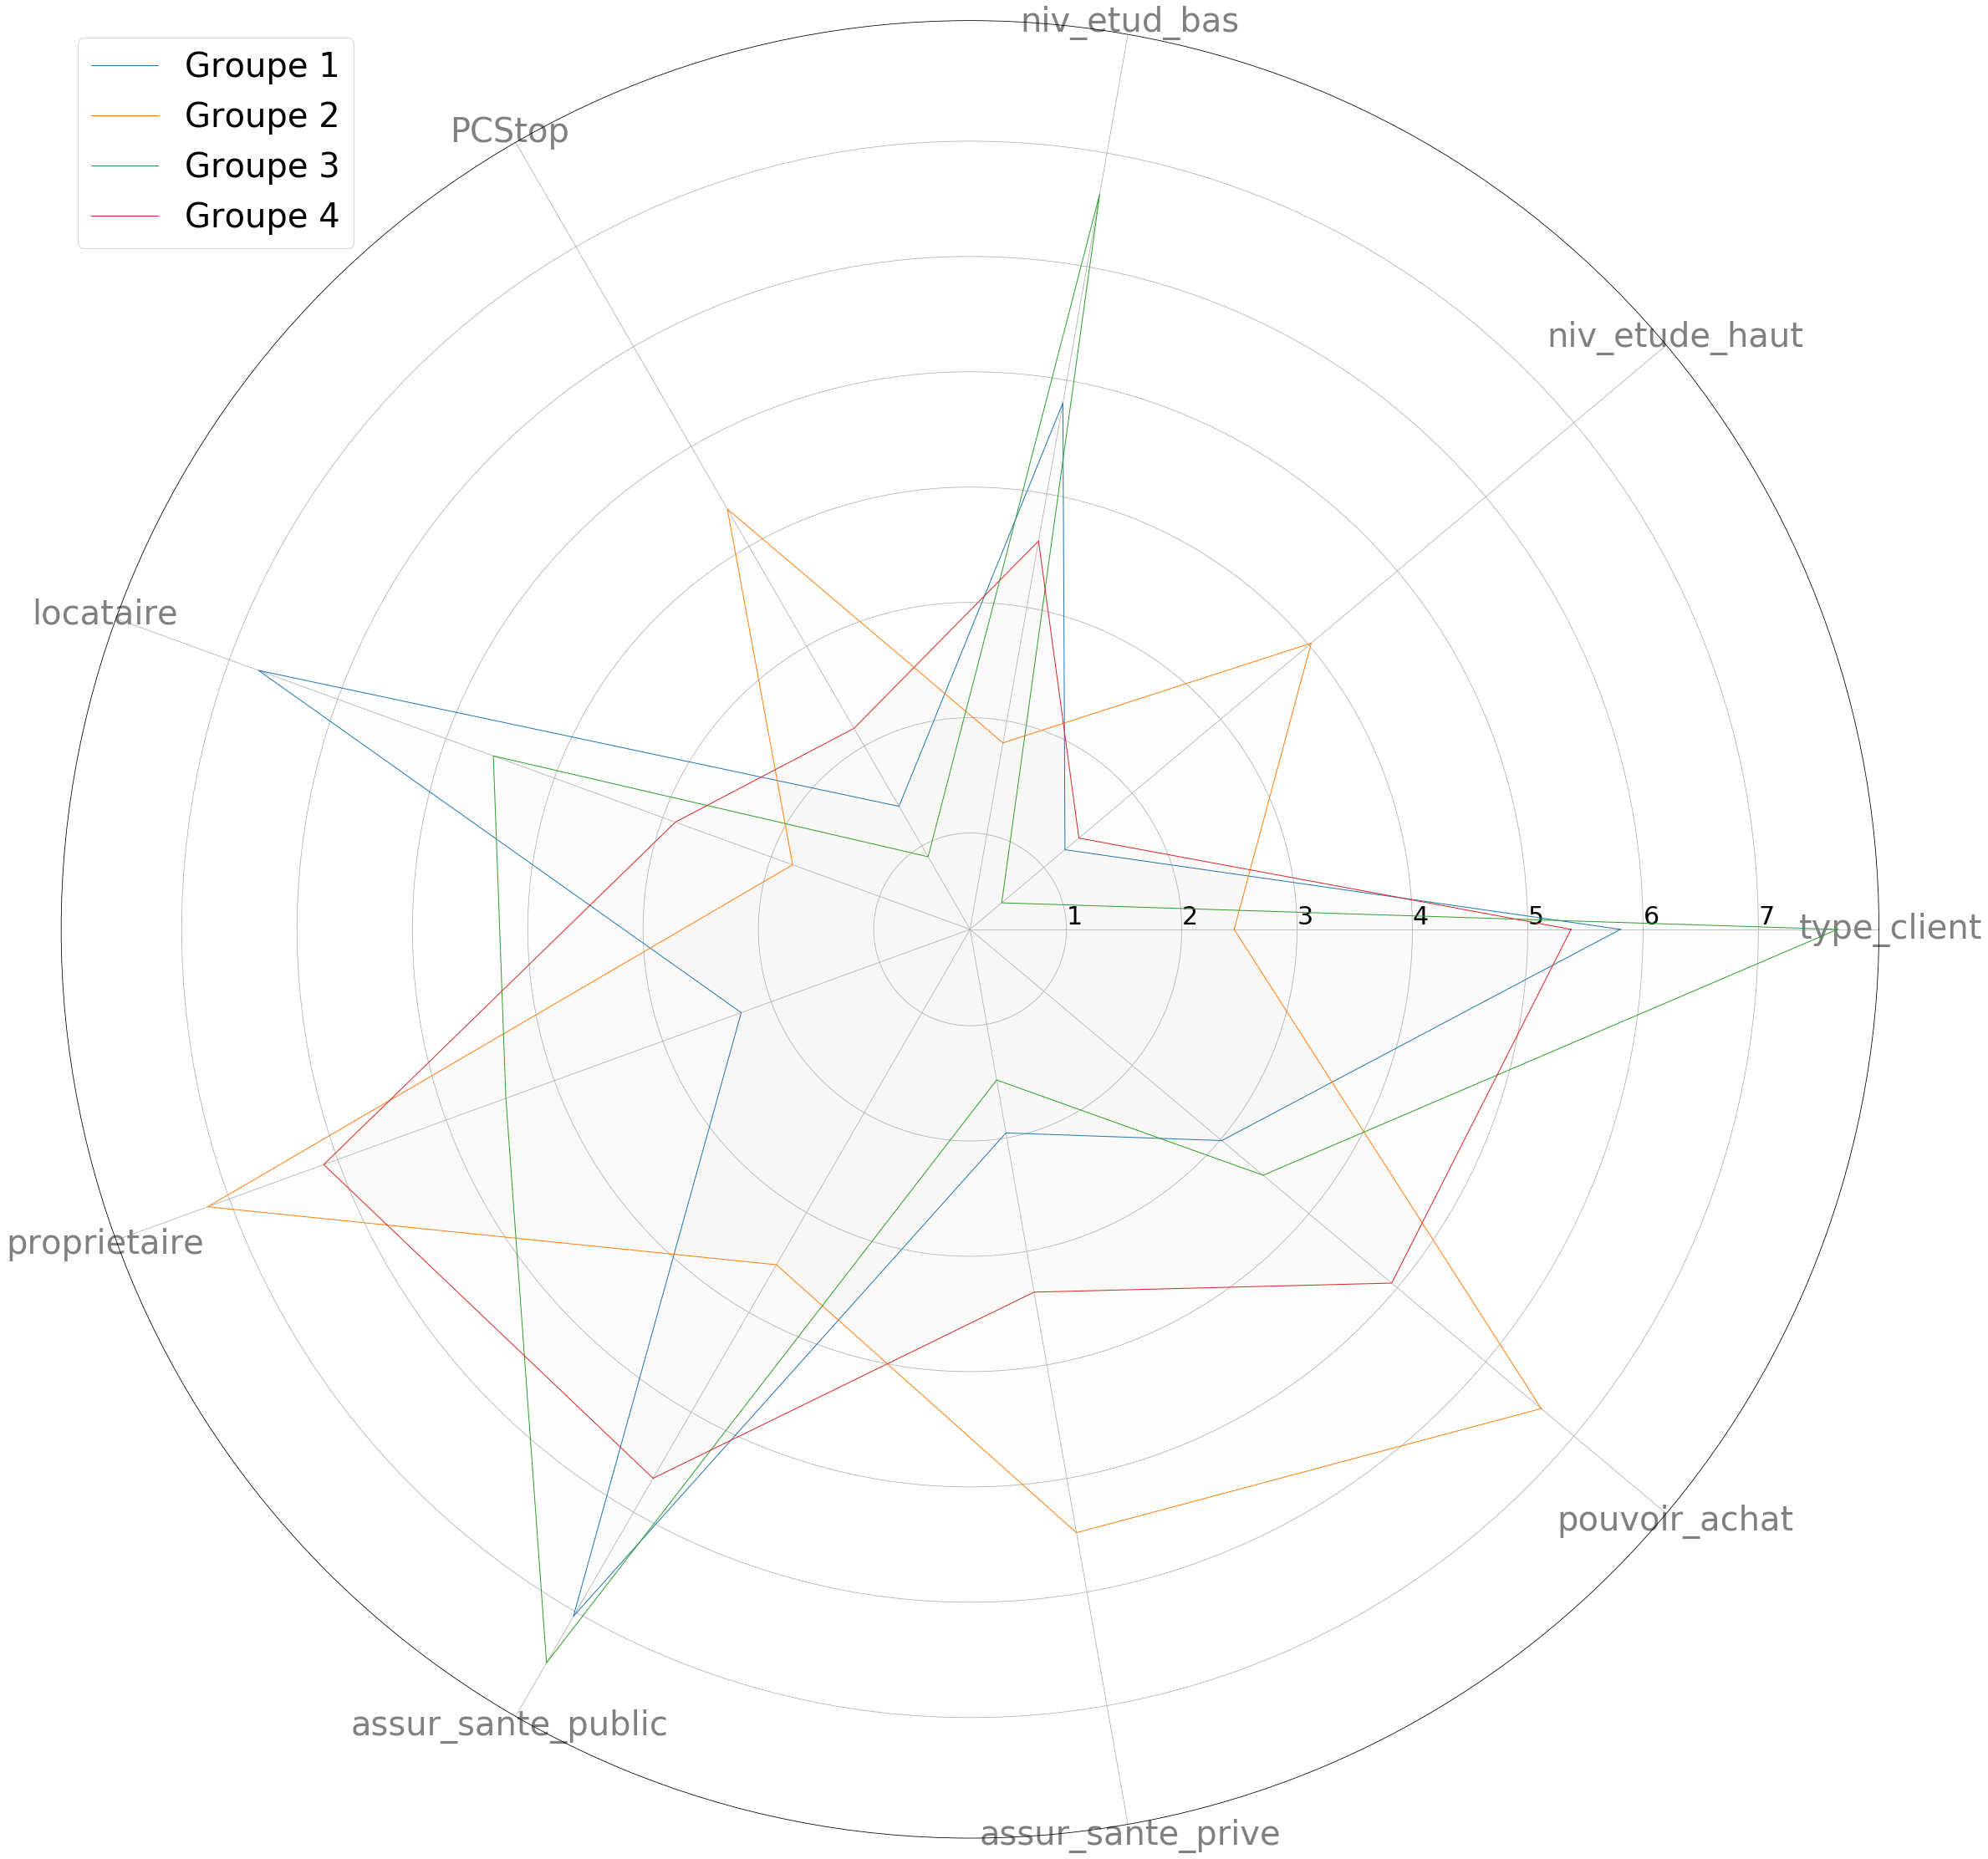

In [51]:
#Nombre de variable
categories=list(radar)[:9]
N = len(categories)
 

# On referme la figure
values=radar.loc[0].values.flatten().tolist()
values += values[:1]

values1 = radar.loc[1].values.flatten().tolist()
values1 += values1[:1]

values2 = radar.loc[2].values.flatten().tolist()
values2 += values2[:1]

values3 = radar.loc[3].values.flatten().tolist()
values3 += values3[:1]

#On repartit les variables sur les axes
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]


fg=plt.figure(figsize = (40,40)) 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 

plt.xticks(angles[:-1], categories, color='grey', size=40)
 

ax.set_rlabel_position(0)
plt.yticks([1,2,3,4,5,6,7], ["1","2","3","4","5","6","7"], color="black", size=30)


ax.plot(angles, values, linewidth=1, linestyle='solid', label = "Groupe 1")
ax.plot(angles, values1, linewidth=1, linestyle='solid', label = "Groupe 2")
ax.plot(angles, values2, linewidth=1, linestyle='solid', label = "Groupe 3")
ax.plot(angles, values3, linewidth=1, linestyle='solid', label ="Groupe 4")

ax.fill(angles, values3, 'crimson', alpha=0.01)
ax.fill(angles, values, 'grey', alpha=0.01)
ax.fill(angles, values1, 'olive', alpha=0.01)
ax.fill(angles, values2, 'lightblue', alpha=0.01)

ax.legend(fontsize = 40)

fg.savefig("Salut.jpg")

In [52]:
from sklearn import preprocessing, decomposition

X = df.iloc[:,0:37]

print(X)

nom_col = X.columns

#pre processing standardisation des données
X_scaler=preprocessing.StandardScaler()
X_scaler.fit(X)
X_standard=X_scaler.transform(X)




       cle  nbmaisons  nbpers_au_foyer  type_client  catholique  protestant  \
0        1          1                3            8           0           5   
1        2          1                2            8           1           4   
2        3          1                2            8           0           4   
3        4          1                3            3           2           3   
4        5          1                4           10           1           4   
...    ...        ...              ...          ...         ...         ...   
5817  5818          1                1            8           0           6   
5818  5819          1                4            8           1           4   
5819  5820          1                3            8           0           6   
5820  5821          1                3            8           0           7   
5821  5822          1                3            8           0           6   

      autre_religion  sans_religion  marie  concubi

In [53]:
#AFD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X_km=X.assign(Cluster=kmeans.labels_)

#On fait l'AFD
method = LinearDiscriminantAnalysis()

#On va avoir trois axes apres l'AFD
lda=method.fit(X_standard,X_km["Cluster"])
X_r2=lda.transform(X_standard)
print(X_r2)

[[-1.1689138   2.0243963   0.48797096]
 [ 0.30887989 -0.61116389  1.81249174]
 [-2.21500162 -1.7109645   1.27944107]
 ...
 [-2.65969122  0.00809125 -0.56697959]
 [-0.89807692  2.42518298 -1.07534137]
 [-1.41958912  1.01990685  0.36959447]]


In [54]:
#On va voir la correlation entre les nouveaux axes et les variables
#Permet de caractériser l'axe et de comprendre les variables qui séparent les goupes sur l'axe 1
#initialisation de val
val=np.zeros(X_standard.shape[1])
print(X_r2[:,0])
print(X_standard[:,0])
print(X_standard[:,0])
print(nom_col[0])
for j in range (0,3):
    for i in range(X_standard.shape[1]):
        #création d'un DataFrame contenant la projection des individus sur les nouveaux axes (X_r2) et les variables d'origines (X_standard)
        corre=pd.DataFrame({'X_r2':X_r2[:,j],nom_col[i]:X_standard[:,i]})
        #calcul des coefficient de corrélation et conservation de la valeur en (0,1) qui nous intéresse
        val[i]=corre.corr().iloc[0,1]
    #trie des valeurs après le calcul des valeurs absolues
    ordre=np.argsort(abs(val))
    #réalisation de l'affichage de la dernière valeur à la première (fortes corrélations en premier)
    print("\n\n")
    for i in range(X_standard.shape[1]-1,-1,-1):
        print(abs(val)[ordre[i]],nom_col[ordre[i]])

[-1.1689138   0.30887989 -2.21500162 ... -2.65969122 -0.89807692
 -1.41958912]
[-1.73175333 -1.73115833 -1.73056333 ...  1.73056333  1.73115833
  1.73175333]
[-1.73175333 -1.73115833 -1.73056333 ...  1.73056333  1.73115833
  1.73175333]
cle



0.74447043440705 assur_sante_prive
0.7440714838648318 assur_sante_public
0.7280531112434361 revenu_moyen
0.6928955538280086 niv_etud_bas
0.6839381470680793 pouvoir_achat
0.6763191921014564 niv_etude_haut
0.6724039933418318 PCStop
0.5615684086875108 revenu1
0.5577817934629563 type_client
0.5540954789919725 locataire
0.5532675363782326 proprietaire
0.5525830027452853 revenu3
0.5276226654368105 auto0
0.46823822695070605 PCSouvr
0.4670072586460621 marie
0.4588033106519577 revenu4
0.44834599417589033 autre_relation
0.43417006784756257 PCSouvr_quali
0.4037321153661268 celibataire
0.38790929294246496 revenu5
0.3452631135259578 nbpers_au_foyer
0.3388012876951558 auto1
0.3032332346959144 niv_etud_moy
0.28527876446723943 revenu2
0.26673077642681337 PCScadr